# di.simtick Demo

This notebook demonstrates the `di.simtick` module — a realistic intraday tick data simulator for KDB-X.

## Import Libraries

In [12]:
import os
import pykx as kx
import matplotlib.pyplot as plt
import pandas as pd

# Get paths
module_path = os.path.expanduser('~/kdbx-modules')
presets_path = f"{module_path}/di/simtick/presets.csv"

# Set QPATH and load module
kx.q(f'setenv[`QPATH;"{module_path}"]')
kx.q('simtick:use`di.simtick')
kx.q(f'cfgs:simtick.loadconfig`$":{presets_path}"')

print("Module loaded successfully!")

Module loaded successfully!


In [13]:
kx.q('key cfgs').pd()

,name
0,default
1,liquid
2,illiquid
3,volatile
4,jumpy


## Select a scenario

In [20]:
scenario = 'default'  # Change to: 'liquid', 'illiquid', 'volatile', 'jumpy'

result = kx.q(f'simtick.run[cfgs`{scenario}]')
trades = result.pd()

print(f"Generated {len(trades)} trades")
trades.head()

Generated 30191 trades


,time,price,qty
0,2026-01-20 09:30:00.689317695,100.000000,60
1,2026-01-20 09:30:01.868664471,100.000824,79
2,2026-01-20 09:30:03.164244531,99.996334,60
3,2026-01-20 09:30:03.216028839,99.995734,81
4,2026-01-20 09:30:03.665811537,100.009424,118


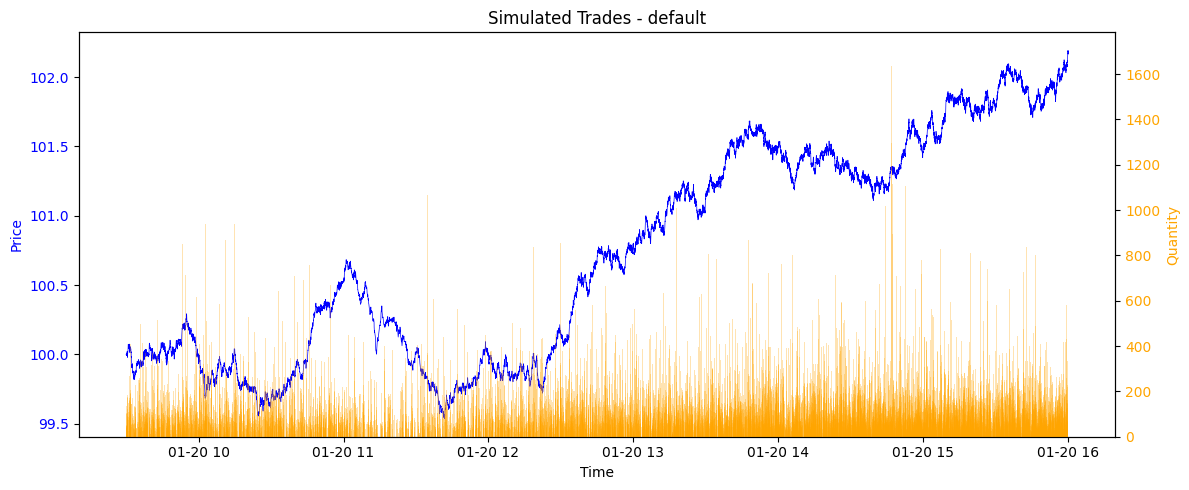

In [18]:
# Cell: Plot price and quantity
fig, ax1 = plt.subplots(figsize=(12, 5))

# Price on left axis
ax1.plot(trades['time'], trades['price'], 'b-', linewidth=0.5, label='Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Quantity on right axis
ax2 = ax1.twinx()
ax2.bar(trades['time'], trades['qty'], width=0.0001, alpha=0.3, color='orange', label='Quantity')
ax2.set_ylabel('Quantity', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'Simulated Trades - {scenario}')
plt.tight_layout()
plt.show()